# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

#### Angie Paola Chacon Pinzon: 201012536
#### Jahir Stevens Rodriguez Riveros: 201819361
#### Juan Andres Cabal Jaramillo: 200620778
#### David Tavera Sánchez: 201016123

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('../P2ModelosAvanzados1/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  total  hour  
datetime                                                                   
2011-01-01 00:00:00        81        0.0       3          13     16     0  
2011-01-01 01:00:00        80        0.0       8          32     40     1  
2011-01-01 02:00:00        80        0.0       5          27     32     2  
2011-01-01 03:00:00        75        0.0       3          10     13     3  
2011-01-01 04:00:00        75        0.0       0           1      1     4

In [6]:
bikes.tail()

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2012-12-19 19:00:00       4        0           1        1  15.58  19.695   
2012-12-19 20:00:00       4        0           1        1  14.76  17.425   
2012-12-19 21:00:00       4        0           1        1  13.94  15.910   
2012-12-19 22:00:00       4        0           1        1  13.94  17.425   
2012-12-19 23:00:00       4        0           1        1  13.12  16.665   

                     humidity  windspeed  casual  registered  total  hour  
datetime                                                                   
2012-12-19 19:00:00        50    26.0027       7         329    336    19  
2012-12-19 20:00:00        57    15.0013      10         231    241    20  
2012-12-19 21:00:00        61    15.0013       4         164    168    21  
2012-12-19 22:00:00        61     6.0032      12         117    129    22  
2012-12-19 23:00:00        66     8.9981       4          84     88    23

- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

El alquiler promedio es mayor en días laborales.

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

El alquiler promedio de bicicletas es mayor después de la jornada laboral, aproximadamente entre las 4 de la tarde y las 7 de la noche.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

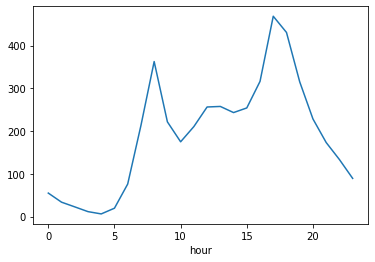

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

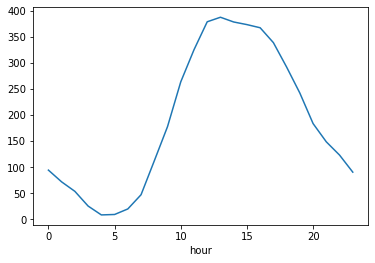

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

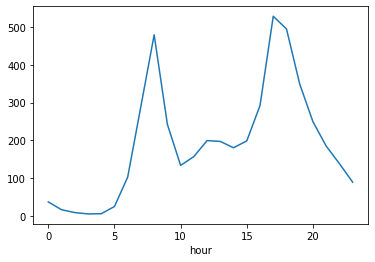

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

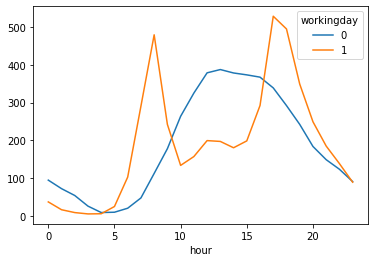

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

Los picos corresponden con el transito normal de una persona empleada: Los dias laborales se presentan picos en el inicio y final de la jornada, mientras que en los dias de descanso el alquiler aumenta después de las once de la mañana. Esto permite ver que los hábitos son diferentes según el día. 
Además, el comportamiento de los días de descanso es más suave y en horas de la tarde.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

bikes_lr=bikes[['hour','workingday','total']]
bikes_lr.head()

regr = linear_model.LinearRegression()
regr.fit(bikes_lr[['hour','workingday']],bikes_lr[['total']])

print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

intercept: [67.70595026]
slope: [[10.49206282  4.07248627]]


Por cada hora adicional del día que pasa se puede esperar que las rentas aumenten en promedio en 10 manteniendo todo lo demás constante. Los dias laborales se alquilan cuatro bicicletas más respecto a los días no laborales, manteniendo todo lo demás constante

La limitación más importante es que el comportamiento siempre está aumentando y no captura los picos estacionales

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bikes[['hour','workingday','total']], random_state=1)

# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.total.mean()
train

hour  workingday  total  prediction
datetime                                                
2012-10-06 00:00:00     0           0    191  189.812714
2012-05-02 21:00:00    21           1    239  189.812714
2012-12-02 09:00:00     9           0    172  189.812714
2011-07-17 05:00:00     5           0     12  189.812714
2012-01-09 17:00:00    17           1    152  189.812714
...                   ...         ...    ...         ...
2011-07-09 13:00:00    13           0    416  189.812714
2012-06-05 22:00:00    22           1    193  189.812714
2011-03-02 04:00:00     4           1      1  189.812714
2011-12-10 10:00:00    10           0    192  189.812714
2011-01-11 02:00:00     2           1      3  189.812714

[8164 rows x 4 columns]

In [15]:
# define a function that calculates the RMSE for a given split of miles
def hours_split(train, hour):
    lower_hour_total = train[train.hour < hour].total.mean()
    higher_hour_total = train[train.hour >= hour].total.mean()
    train['prediction'] = np.where(train.hour < hour, lower_hour_total, higher_hour_total)
    return np.sqrt(mean_squared_error(train.total, train.prediction))

def work_split(train, work):
    lower_work_total = train[train.workingday < work].total.mean()
    higher_work_total = train[train.workingday >= work].total.mean()
    train['prediction'] = np.where(train.workingday < work, lower_work_total, higher_work_total)
    return np.sqrt(mean_squared_error(train.total, train.prediction))

In [16]:
# calculate RMSE for tree which splits on hour 10
print('RMSE:', hours_split(train, 10))
print('RMSE:', work_split(train, 0))

RMSE: 164.1687865077353
RMSE: 179.99052000195584


Text(0, 0.5, 'RMSE (lower is better)')

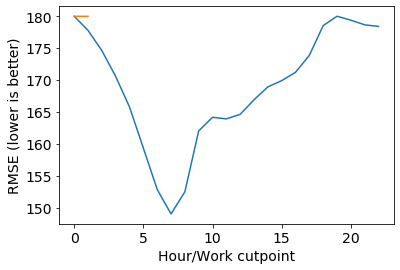

In [17]:
# check all possible hour splits
hour_range = range(train.hour.min(), train.hour.max(), 1)
RMSE_hour = [hours_split(train, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

In [18]:
# Variable más importante hours (lado izquierdo hour < 7, lado derecho hour >= 7)
train_izq = train.loc[train.hour<7].copy()
train_izq.hour.unique()

array([0, 5, 6, 4, 1, 3, 2], dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

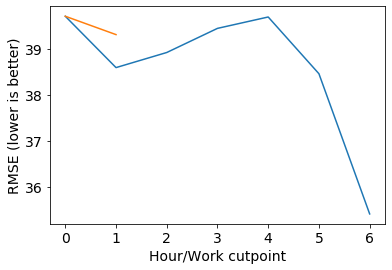

In [19]:
# check all possible hour splits
hour_range = range(train_izq.hour.min(), train_izq.hour.max()+1, 1)
RMSE_hour = [hours_split(train_izq, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_izq, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

In [20]:
train_der = train.loc[train.hour >= 7].copy()
train_der.hour.unique()

array([21,  9, 17, 19, 23, 20, 11, 18, 12, 22, 13,  7, 10, 14, 15,  8, 16],
      dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

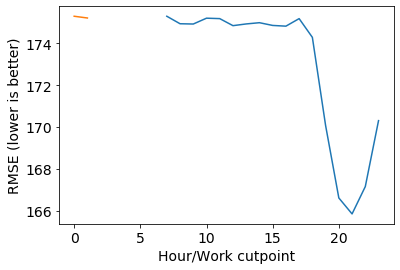

In [21]:
# check all possible hour splits
hour_range = range(train_der.hour.min(), train_der.hour.max()+1, 1)
RMSE_hour = [hours_split(train_der, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_der, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

In [22]:
train_izq_izq = train_izq.loc[train_izq.hour < 6].copy()
train_izq_izq.hour.unique()

array([0, 5, 4, 1, 3, 2], dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

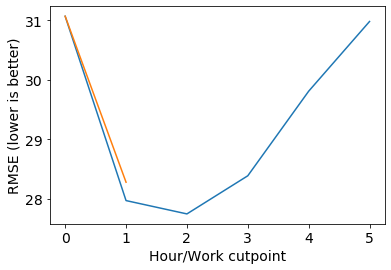

In [23]:
# check all possible hour splits
hour_range = range(train_izq_izq.hour.min(), train_izq_izq.hour.max()+1, 1)
RMSE_hour = [hours_split(train_izq_izq, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_izq_izq, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

In [24]:
train_der_der = train_der.loc[train_der.hour >= 21].copy()
train_der_der.hour.unique()

array([21, 23, 22], dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

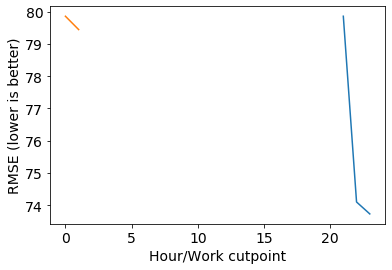

In [25]:
# check all possible hour splits
hour_range = range(train_der_der.hour.min(), train_der_der.hour.max()+1, 1)
RMSE_hour = [hours_split(train_der_der, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_der_der, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [26]:
X = bikes[['hour','workingday']]
y = bikes['total']

from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [27]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

105.19244713068338

In [28]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

149.27606558022308

In [29]:
# list of values to try
max_depth_range = range(1, 15)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

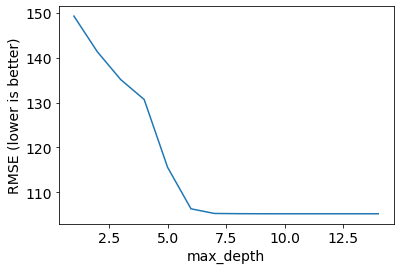

In [30]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [31]:
# max_depth=7 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [32]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
feature_cols = ['hours', 'workingday']
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

feature  importance
0       hours     0.81491
1  workingday     0.18509

In [33]:
!{sys.executable} -m pip install graphviz

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


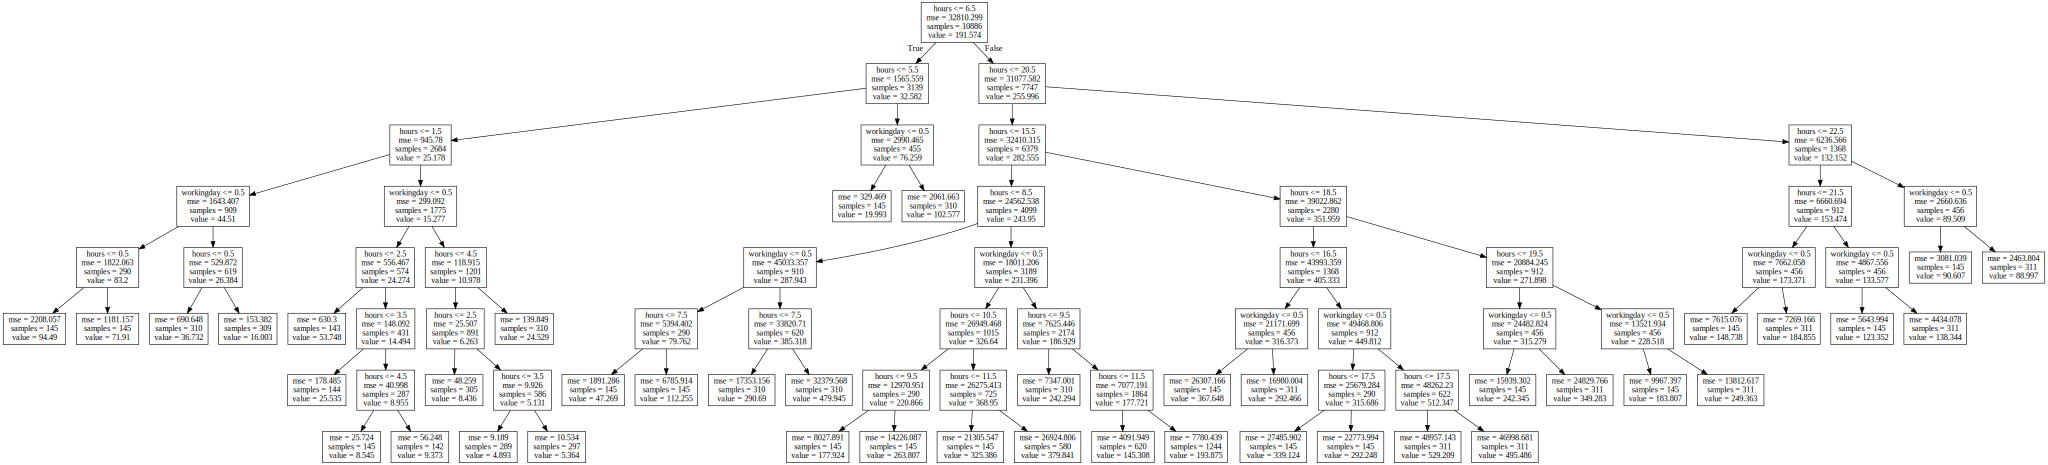

In [34]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# create a Graphviz file
from sklearn.tree import export_graphviz
import graphviz
g_tree = export_graphviz(treereg, out_file=None, feature_names=feature_cols)

graph = graphviz.Source(g_tree) 

# Show graph
graph

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [35]:
df = pd.read_csv('../P2ModelosAvanzados1/datasets/mashable.csv', index_col=0)
df.head()

url  timedelta  \
0  http://mashable.com/2014/12/10/cia-torture-rep...       28.0   
1  http://mashable.com/2013/10/18/bitlock-kicksta...      447.0   
2  http://mashable.com/2013/07/24/google-glass-po...      533.0   
3  http://mashable.com/2013/11/21/these-are-the-m...      413.0   
4  http://mashable.com/2014/02/11/parking-ticket-...      331.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             9.0             188.0         0.732620               1.0   
1             7.0             297.0         0.653199               1.0   
2            11.0             181.0         0.660377               1.0   
3            12.0             781.0         0.497409               1.0   
4             8.0             177.0         0.685714               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.844262        5.0             1.0       1.0  ...   
1                  0.815789        9.0             4.0       1.0  ...   
2                  0.775701        4.0             3.0       1.0  ...   
3                  0.677350       10.0             3.0       1.0  ...   
4                  0.830357        3.0             2.0       1.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.200000                   0.80              -0.487500   
1               0.160000                   0.50              -0.135340   
2               0.136364                   1.00               0.000000   
3               0.100000                   1.00              -0.195701   
4               0.100000                   0.55              -0.175000   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                  -0.60              -0.250000                 0.9   
1                  -0.40              -0.050000                 0.1   
2                   0.00               0.000000                 0.3   
3                  -0.40              -0.071429                 0.0   
4                  -0.25              -0.100000                 0.0   

   title_sentiment_polarity  abs_title_subjectivity  \
0                       0.8                     0.4   
1                      -0.1                     0.4   
2                       1.0                     0.2   
3                       0.0                     0.5   
4                       0.0                     0.5   

   abs_title_sentiment_polarity  Popular  
0                           0.8        1  
1                           0.1        0  
2                           1.0        0  
3                           0.0        0  
4                           0.0        0  

[5 rows x 61 columns]

In [36]:
df.shape

(6000, 61)

In [37]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [38]:
y.mean()

0.5

In [39]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

Decision Tree Classifier

In [40]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

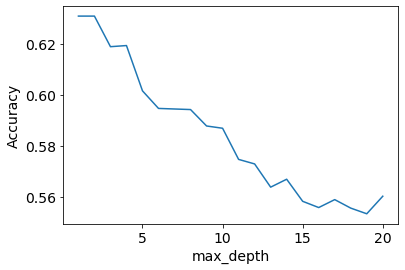

In [41]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [42]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [43]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.6453333333333333
F1-Score: 0.6448598130841121


Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logit = LogisticRegression(solver = 'liblinear', random_state = 1)
logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, logit_pred))
print("F1-Score:", f1_score(y_test, logit_pred))

Accuracy: 0.6273333333333333
F1-Score: 0.6104529616724739


Teniendo en cuenta las el 'accuracy'y el 'F1-Score' el mejor modelo es el árbol de clasificación con valores iguales a 0.645 y 0.644 respectivamente.

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [47]:
# set a seed for reproducibility
np.random.seed(1)

n_samples = X_train.shape[0]
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a = n_samples, size = n_samples, replace = True) for _ in range(1, n_B + 1 )]
len(samples)

300

In [48]:
models = {0: DecisionTreeClassifier(max_depth=None, random_state=1),
          1: DecisionTreeClassifier(max_depth=2, random_state=1),
          2: LogisticRegression()}

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])

In [49]:
import math
for i, sample in enumerate(samples):
    md = math.floor((i)/100)
    X = X_train.iloc[sample, 0:]
    y = y_train.iloc[sample]
    m = models[md].fit(X, y)
    y_pred[[i]] = m.predict(X_test)

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [50]:
y_pred.head()

0   1   2   3   4   5   6   7   8   9    ... 290 291 292 293 294 295 296  \
1483   1   1   0   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   1   
2185   1   1   1   0   1   1   1   0   0   1  ...   1   0   1   1   1   0   1   
2520   0   1   1   1   1   0   0   1   0   1  ...   1   1   1   1   1   1   1   
3721   0   0   0   0   0   0   0   1   1   0  ...   1   1   1   1   1   1   1   
3727   0   1   0   0   0   0   1   1   1   0  ...   0   0   0   0   0   0   0   

     297 298 299  
1483   1   1   1  
2185   1   1   0  
2520   1   1   1  
3721   1   1   1  
3727   0   0   0  

[5 rows x 300 columns]

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [51]:
bag_pred = (y_pred.sum(axis = 1) >= (n_B / 2)).astype(np.int)

In [52]:
print("Accuracy:", accuracy_score(y_test, bag_pred))
print("F1-Score:", f1_score(y_test, bag_pred))

Accuracy: 0.634
F1-Score: 0.624229979466119


# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [53]:
from sklearn.metrics import precision_recall_curve

y_prob = (y_pred.sum(axis = 1)/n_B)
prec, recall, threshold = precision_recall_curve(y_test, y_prob)

In [54]:
f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.13666666666666666
Mejor F1: 0.7079918032786886


# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [55]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [56]:
errors = np.zeros(n_B)

for i in range(n_B):
    md = math.floor((i)/100)
    y_pred_ = models[md].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

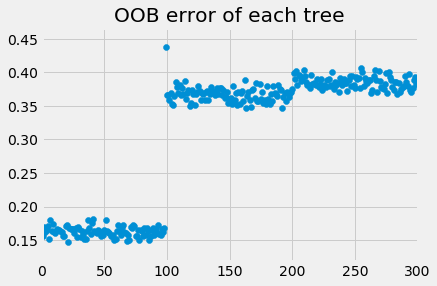

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

In [58]:
alpha = (1 - errors) / (1 - errors).sum()

In [59]:
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)

In [60]:
weighted_sum_1.head(20)

1483    0.919649
2185    0.761412
2520    0.819189
3721    0.844638
3727    0.113413
4524    0.850233
234     0.057519
4735    0.148738
5839    0.383060
2939    0.788065
3053    0.843227
867     0.856207
276     0.859421
5798    0.088391
3512    0.931666
5789    0.076607
3198    0.825342
5908    0.919625
5718    0.229223
2687    0.071252
dtype: float64

In [61]:
y_pred_w = (weighted_sum_1 >= 0.5).astype(np.int)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred_w))
print("F1-Score:", f1_score(y_test, y_pred_w))

Accuracy: 0.6353333333333333
F1-Score: 0.6261107313738892


# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [63]:
prec, recall, threshold = precision_recall_curve(y_test, weighted_sum_1)

f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.16356140236035835
Mejor F1: 0.7079463364293087


# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [64]:
est_feat = pd.DataFrame(index=X_train.index, columns=[list(range(n_B))])

for i, sample in enumerate(samples):
    md = math.floor((i)/100)
    X = X_train.iloc[sample, 0:]
    y = y_train.iloc[sample]
    m = models[md].fit(X, y)
    est_feat[[i]] = m.predict(X_train)

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
log = LogisticRegression()
log.fit(est_feat, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_stack = log.predict_proba(y_pred)[:,1]

In [67]:
prec, recall, threshold = precision_recall_curve(y_test, y_stack)

f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.012509114945312544
Mejor F1: 0.7046945986875315
